In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## データセット作成

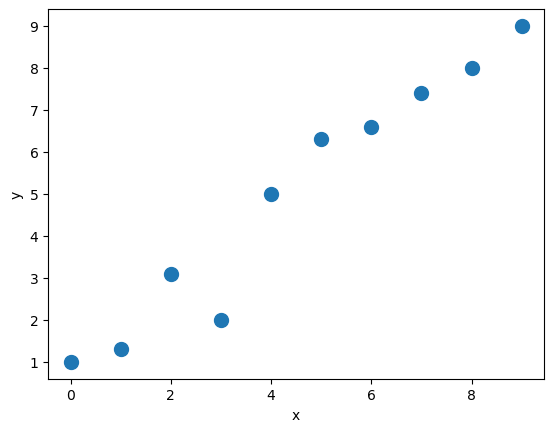

In [4]:
x_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 
                    7.4, 8.0, 9.0], dtype=np.float32)

plt.plot(x_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [8]:
print(x_train_norm.shape)
print(y_train_norm.shape)

# 形状が一致しているか確認
assert x_train_norm.shape[0] == y_train_norm.shape[0], "The first dimension of x_train_norm and y_train_norm must be the same"

torch.Size([10, 1])
torch.Size([10])


## 訓練データセットと対応するデータローダー作成

In [14]:
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data import DataLoader

x_train_norm = (x_train - np.mean(x_train)) / np.std(x_train)
x_train_norm = torch.from_numpy(x_train_norm).float()


y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(x_train_norm, y_train)

batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

## 確率勾配降下法

In [15]:
torch.manual_seed(0)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

def loss_fn(input, target):
    return (input - target).pow(2).mean()

def model(xb):
    return xb @ weight.t() + bias

learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        
        with torch.no_grad():
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate
            weight.grad.zero_()
            bias.grad.zero_()
            
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss: {loss.item():.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch 0 Loss: 9.7532
Epoch 10 Loss: 23.8375
Epoch 20 Loss: 18.3256
Epoch 30 Loss: 0.6222
Epoch 40 Loss: 4.9872
Epoch 50 Loss: 4.9342
Epoch 60 Loss: 0.0743
Epoch 70 Loss: 2.0869
Epoch 80 Loss: 1.7429
Epoch 90 Loss: 0.7963
Epoch 100 Loss: 0.3350
Epoch 110 Loss: 2.0198
Epoch 120 Loss: 0.1548
Epoch 130 Loss: 0.0803
Epoch 140 Loss: 0.0123
Epoch 150 Loss: 0.0402
Epoch 160 Loss: 1.9228
Epoch 170 Loss: 2.0107
Epoch 180 Loss: 0.3522
Epoch 190 Loss: 0.3299
